#### Complete Case Analysis (CCA) also known as Listwise Deletion, involes removing all rows from the datasets taht contain any missing values. 

##### Only those observations (rows) that no missing values across the selected variables are used for analysis. 

#### When should we use CCA? 

##### CCA can be a good choice only if certain assumptions are met. Use it when:
* Data is Missing Completely at Random (MCAR):
| The probability of missingness is unrelated to any observed or unboserved data.

* Missing Data is a small Proportion:
* Preferably less than 5-10% of the datasets.

* We have a large dataset


##### Advantage
* Easy to implement as no data manipulation required 
* Preserves variable distribution(if data is MCAR, then the distribution of the variables of the reduced dataset should match the  distribution in the original dataset)

##### Disadvantage
* It can exclude a large fraction of the original dataset (if missing data is abundant)
* Excluded observation could be informative for the analysis (if data is not missing at random)
* When using our models in production, the model will not know how to handle missing data

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

In [7]:
cols=[var for var in df.columns if df[var].isnull().mean() < 0.5 and df[var].isnull().mean()>0] 
cols

['city_development_index',
 'gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'training_hours']

In [8]:
df[cols].sample(5)

,city_development_index,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours
18311,0.624,NaN,no_enrollment,Graduate,STEM,2.0,50-99,Pvt Ltd,53.0
5700,0.920,NaN,Full time course,Masters,STEM,5.0,NaN,NaN,26.0
12200,0.896,Male,no_enrollment,Graduate,Arts,20.0,NaN,NaN,30.0
4253,0.920,Male,Full time course,Graduate,STEM,8.0,NaN,NaN,34.0
10900,0.743,Male,no_enrollment,Masters,STEM,14.0,100-500,Pvt Ltd,84.0


In [9]:
len(df[cols].dropna())/len(df)

0.44023384486898426

In [10]:
new_df=df[cols]=df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (8434, 9))

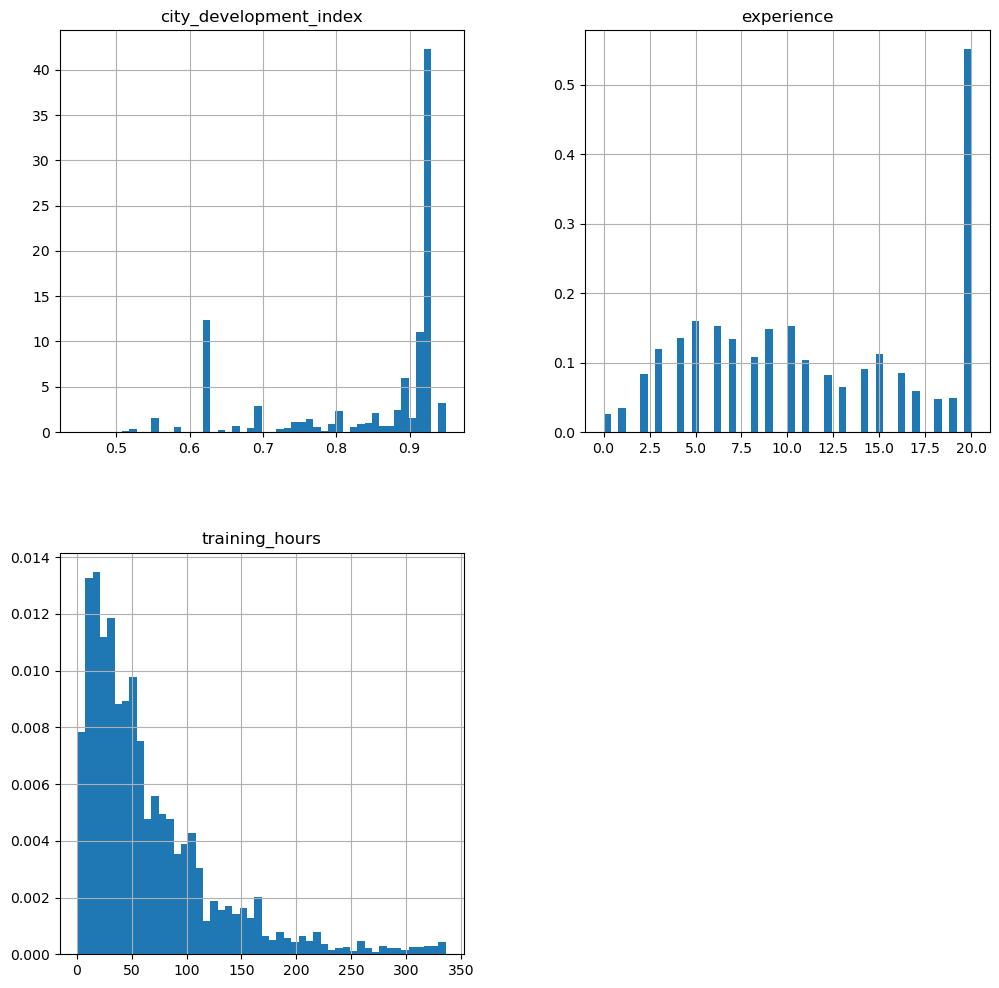

In [11]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

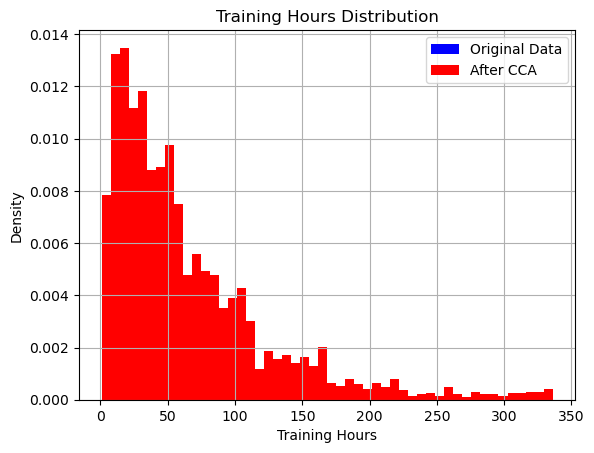

In [13]:
# after applying CCA plot the histogram to check the distribution if the distribution is comparable to the original distribution then we can proceed with CCA

fig=plt.figure()
ax=fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50,density=True,ax=ax,color='blue')

new_df['training_hours'].hist(bins=50,density=True,ax=ax,color='red')
plt.legend(['Original Data','After CCA'])
plt.title('Training Hours Distribution')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.show()




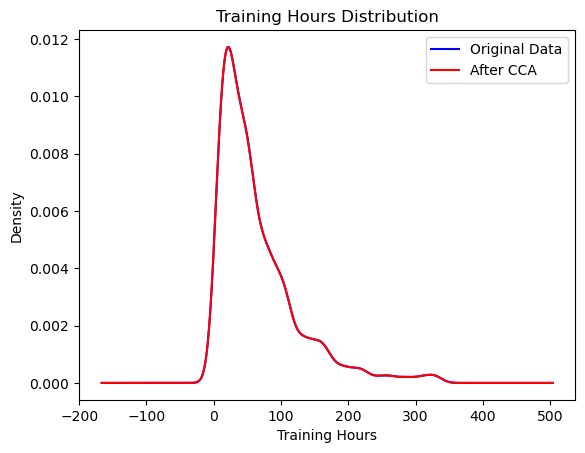

In [15]:

fig=plt.figure()
ax=fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='blue')

new_df['training_hours'].plot.density(color='red')
plt.legend(['Original Data','After CCA'])
plt.title('Training Hours Distribution')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.show()




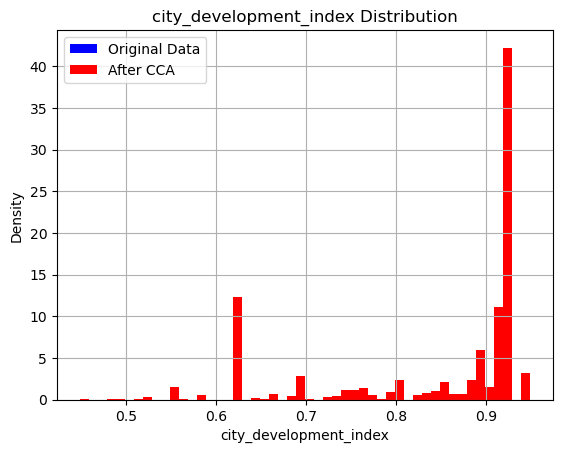

In [16]:


fig=plt.figure()
ax=fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50,density=True,ax=ax,color='blue')

new_df['city_development_index'].hist(bins=50,density=True,ax=ax,color='red')
plt.legend(['Original Data','After CCA'])
plt.title('city_development_index Distribution')
plt.xlabel('city_development_index')
plt.ylabel('Density')
plt.show()




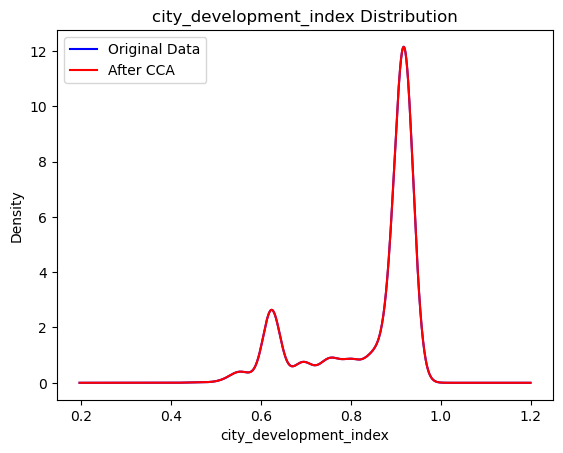

In [18]:


fig=plt.figure()
ax=fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='blue')

new_df['city_development_index'].plot.density(color='red')
plt.legend(['Original Data','After CCA'])
plt.title('city_development_index Distribution')
plt.xlabel('city_development_index')
plt.ylabel('Density')
plt.show()




In [19]:
temp=pd.concat([
    # percentage of observations per category, original data 
    df['enrolled_university'].value_counts()/len(df),
    
    # predicted percentage of observations per category, after CCA
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1)

temp.columns=['Original Data','After CCA']
temp

,Original Data,After CCA
enrolled_university,,
no_enrollment,0.373421,0.848233
Full time course,0.040610,0.092246
Part time course,0.026203,0.059521


In [20]:
# as ratio is same we can proceed with CCA